In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
satisfaction_df = pd.read_csv('Survey data_Inflight Satisfaction Score.csv')
comments_df = pd.read_csv('Survey data _Customer comments.csv')

Root Cause Analysis

In [3]:
# Convert the scheduled_departure_date to datetime format
satisfaction_df['scheduled_departure_date'] = pd.to_datetime(satisfaction_df['scheduled_departure_date'])
# Filter for summer months
summer_months = [6, 7, 8, 9]
filtered_satisfaction_df = satisfaction_df[satisfaction_df['scheduled_departure_date'].dt.month.isin(summer_months)]
# Filter for scores from 1 to 5
filtered_satisfaction_df = filtered_satisfaction_df[filtered_satisfaction_df['score'].isin(['1', '2', '3', '4', '5'])]

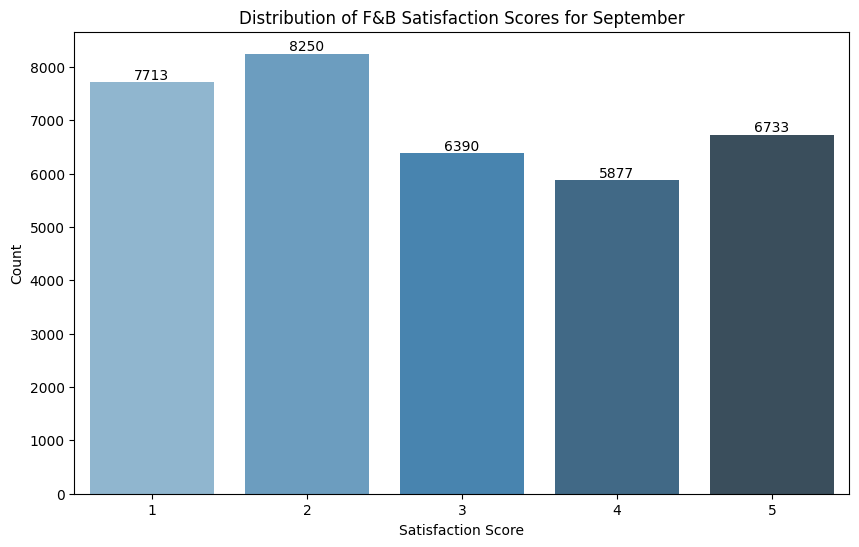

In [4]:
# Plot distribution of scores for September
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=satisfaction_df, x='score', order=['1', '2', '3', '4', '5'], palette="Blues_d")
plt.title('Distribution of F&B Satisfaction Scores for September')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
for bars in ax.containers:
 ax.bar_label(bars)
plt.show()


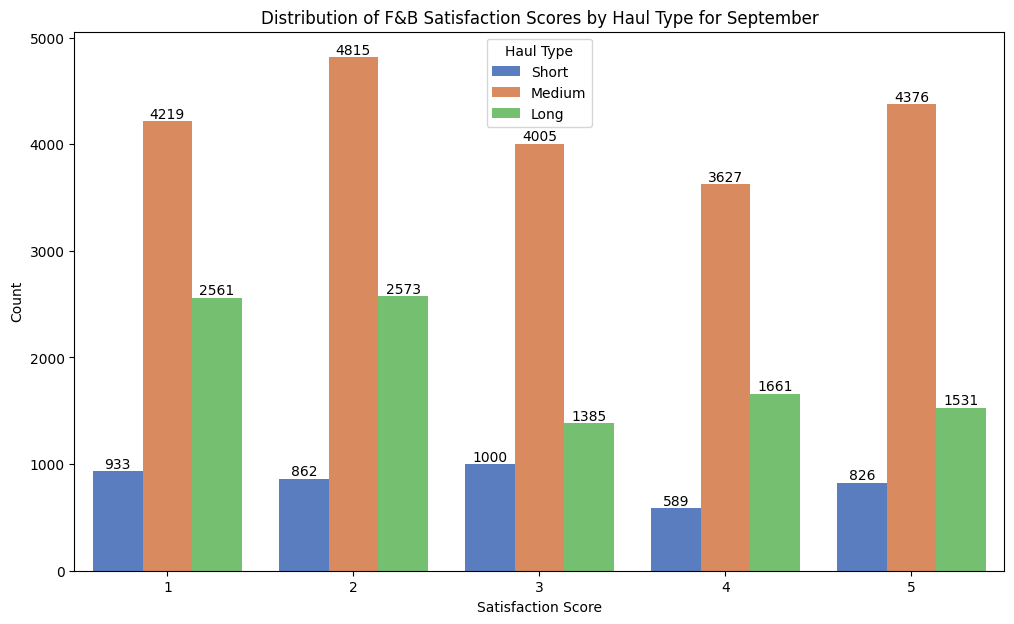

In [5]:
# Plot distribution of scores based on haul type
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=satisfaction_df, x='score', hue='haul_type', order=['1', '2', '3', '4', '5'], palette="muted")
plt.title('Distribution of F&B Satisfaction Scores by Haul Type for September')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.legend(title='Haul Type')
for bars in ax.containers:
 ax.bar_label(bars)
plt.show()


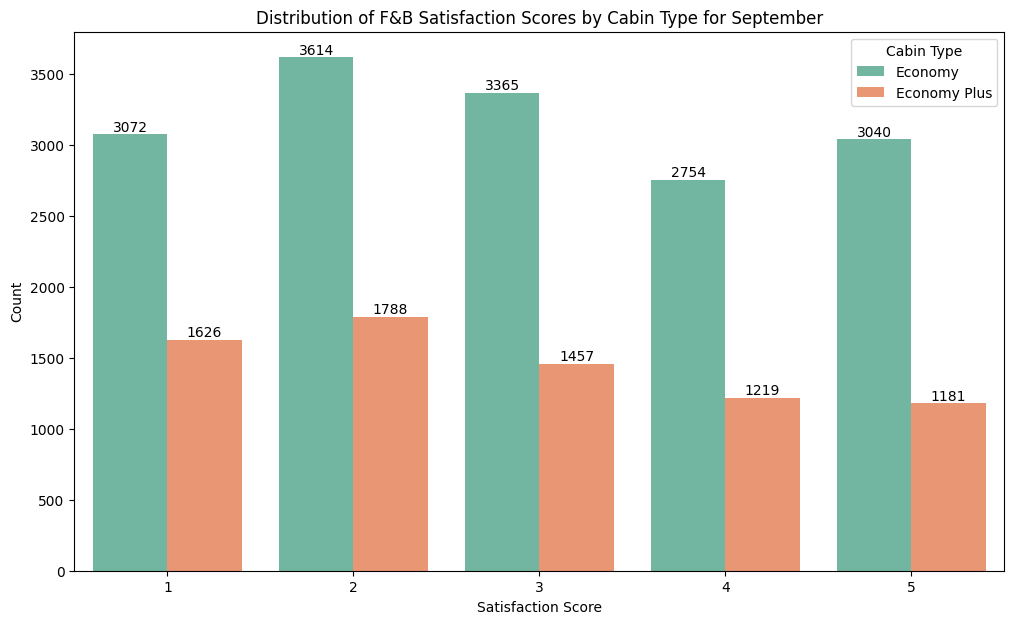

In [6]:
# Plot distribution of scores based on cabin type
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=satisfaction_df, x='score', hue='cabin_name', order=['1', '2', '3', '4', '5'], palette="Set2")
plt.title('Distribution of F&B Satisfaction Scores by Cabin Type for September')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.legend(title='Cabin Type')
for bars in ax.containers:
 ax.bar_label(bars)

plt.show()


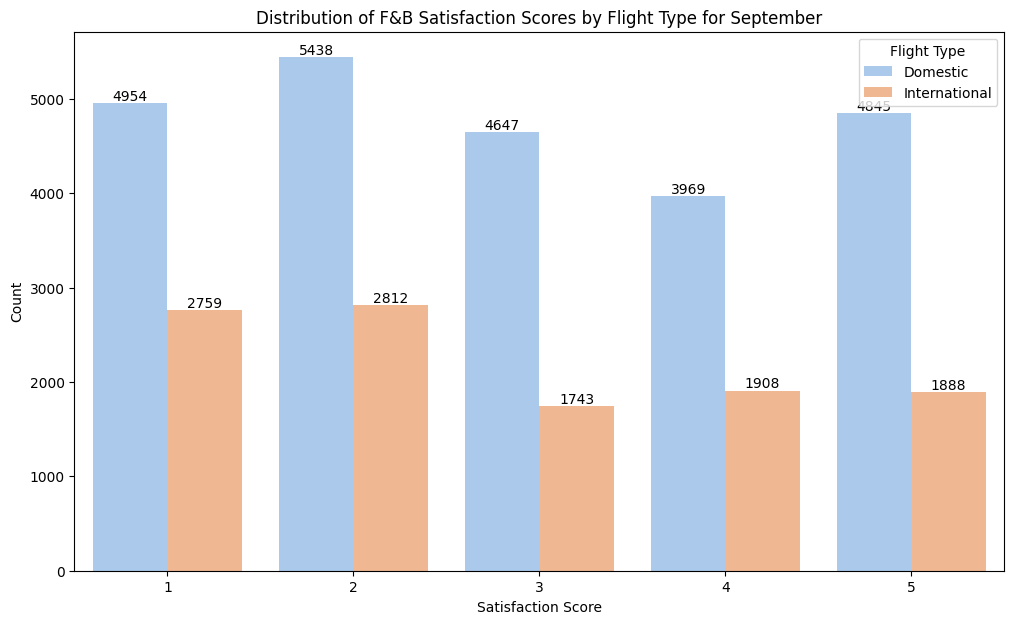

In [7]:

# Plot distribution of scores based on flight type (Domestic vs. International)
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=satisfaction_df, x='score', hue='international_domestic_indicator', order=['1', '2', '3', '4', '5'], palette="pastel")
plt.title('Distribution of F&B Satisfaction Scores by Flight Type for September')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.legend(title='Flight Type')
for bars in ax.containers:
 ax.bar_label(bars)
plt.show()


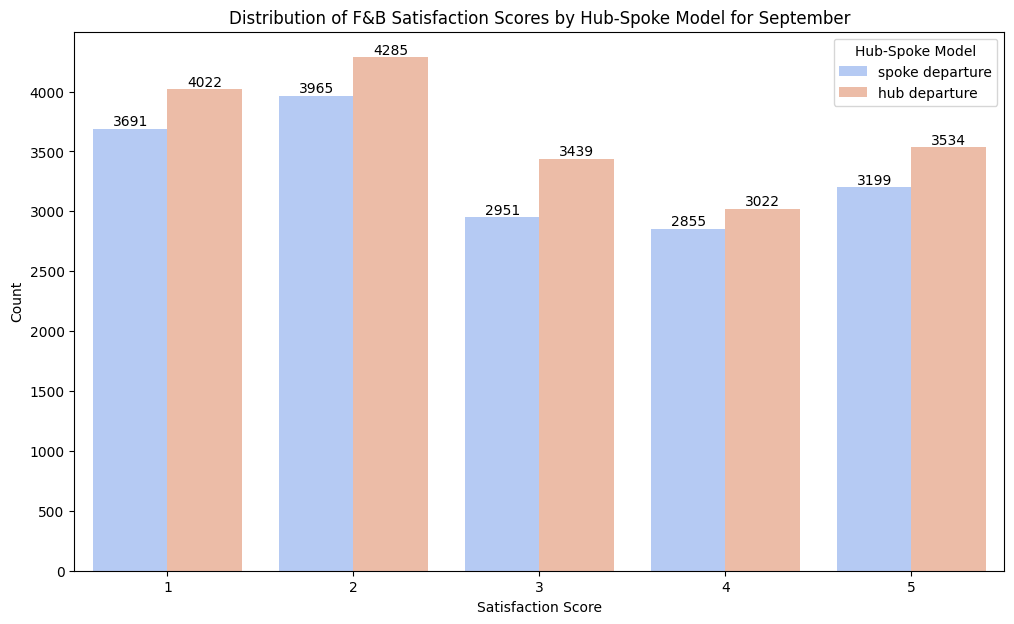

In [8]:
# Plot distribution of scores based on Hub-Spoke model
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=satisfaction_df, x='score', hue='hub_spoke', order=['1', '2', '3', '4', '5'], palette="coolwarm")
plt.title('Distribution of F&B Satisfaction Scores by Hub-Spoke Model for September')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.legend(title='Hub-Spoke Model')
for bars in ax.containers:
 ax.bar_label(bars)
plt.show()


In [9]:
# Define a set of common stopwords
stop_words = set([
 "ourselves", "hers", "between", "yourself", "but",
 "again", "there", "about", "once", "during", "out",
 "very", "having", "with", "they", "own", "an", "be",
 "some", "for", "do", "its", "yours", "such", "into",
 "of", "most", "itself", "other", "off", "is", "s", "am",
 "or", "who", "as", "from", "him", "each", "the", "themselves",
 "until", "below", "are", "we", "these", "your", "his", "through",
 "don", "nor", "me", "were", "her", "more", "himself", "this",
 "down", "should", "our", "their", "while", "above", "both", "up",
 "to", "ours", "had", "she", "all", "no", "when", "at", "any", "before",
 "them", "same", "and", "been", "have", "in", "will", "on", "does",
 "yourselves", "then", "that", "because", "what", "over", "why", "so",
 "can", "did", "not", "now", "under", "he", "you", "herself", "has",
 "just", "where", "too", "only", "myself", "which", "those", "i",
 "after", "few", "whom", "t", "being", "if", "theirs", "my",
 "against", "a", "by", "doing", "it", "how", "further", "was", "here", "than", "would", "could"
])
# Define a function to preprocess text
def simple_preprocess(text):
 # Convert to lowercase and tokenize
 tokens = text.lower().split()
 # Remove stopwords and punctuation
 tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
 return tokens
# Apply the function to the verbatim_text column
simple_tokens_list = comments_df['verbatim_text'].dropna().apply(simple_preprocess)
# Flatten the list of tokens
all_simple_tokens = [token for sublist in simple_tokens_list for token in sublist]
# Get the frequency of each token
simple_word_freq = Counter(all_simple_tokens)
simple_word_freq.most_common(20)

[('food', 1294),
 ('flight', 1157),
 ('snack', 744),
 ('meal', 631),
 ('like', 598),
 ('offered', 540),
 ('options', 474),
 ('snacks', 455),
 ('first', 448),
 ('better', 425),
 ('nice', 395),
 ('good', 391),
 ('chicken', 377),
 ('class', 353),
 ('one', 350),
 ('get', 343),
 ('served', 340),
 ('offer', 328),
 ('water', 322),
 ('united', 303)]

In [10]:
# Extract sample comments that mention the word "food"
food_related_comments = comments_df[comments_df['verbatim_text'].str.contains("food", case=False, na=False)]
# Display a sample of these comments - sample size of 30
sample_food_comments = food_related_comments['verbatim_text'].sample(30).tolist()
sample_food_comments


['Creative food selection.',
 'Beverage selection in First class is excellent. The food is terrible, and for a 5+ hour flight. a snack should be provided midway.',
 'The food options could use more veriety instead of just the biscoff, need nuts or other savory and healthier options. Make it happen.',
 'The food was extremely salty which although the portion size was good the extreme use of salt may it inedible. I was barely able to consume 1/4 of the serving. And my husband was also unable to consume it.',
 'There was no food/snack. Only meals for purchase.',
 'Improve the food.',
 'The dinner that was served was okay. The main dish was pretty warm. the other items were ice cold. Better than many flights I have been on in the past. I know it is hard to feed a plane load of people and that your chefs work hard to make food palatable.',
 'The food was much better than expected, more flavorful and interesting.',
 'I was unfamiliar with the process of food and drinks only going through an 

In [11]:
# Extract sample comments that mention the word "snack"
snack_related_comments = comments_df[comments_df['verbatim_text'].str.contains("snack", case=False, na=False)]
# Display a sample of these comments
sample_snack_comments = snack_related_comments['verbatim_text'].sample(30).tolist()
sample_snack_comments


['Please serve some snacks during the trip.',
 'Beverages are always fine. the 2 cookie choices offered also taste good. However, in my opinion pretzel snacks, etc should be larger. For the amount of money airlines charge, and the fact the passengers are crammed into ever tighter spaces, the very least an economy passenger should receive is an average sized snack-not a teeny mini one.',
 'Yes, I am a person with a Gluten sensitivity. Please offer at least one Gluten free snack.',
 'Our pre order food was not given to us together with the snack wafer not until we asked for them. We were served right away. the problem was their system was not working. Maybe before flight system should be in good working condition. We were satisfied with our order, though.',
 'You should always include a gluten free option with your snacks.',
 'A meal was served, and it was quite good (I chose tortellini), and served hot, and I had a selection of wines to choose from -- that was nice!. Where I think my re